This file is used to explore the distribution and data present in the dataset. 

Import usefull livraries, load main.csv dataset. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

DF_PATH : str = r'../data/main.csv'
TARGET : str = 'type'  # Replace with the actual target column name
TARGET_2 :str = 'quality'  # Replace with the actual second target column name

# Load the dataset
data = pd.read_csv(DF_PATH)
print("Data loaded successfully.")
print("Number of lines/columns :", data.shape)
print("Columns :", data.columns.tolist())

Data loaded successfully.
Number of lines/columns : (6497, 13)
Columns : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


Find column types, find target features, etc...

In [4]:
print("------------ Column types ------------")
print(data.dtypes)

print("All columns seems to be float32 except 'id' (int64) and 'diagnosis' (object).")

# Check uniques values of 'diagnosis' column
print("------------ Unique values in 'diagnosis' column ------------")
print(data[TARGET].value_counts())

------------ Column types ------------
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object
All columns seems to be float32 except 'id' (int64) and 'diagnosis' (object).
------------ Unique values in 'diagnosis' column ------------
type
white    4898
red      1599
Name: count, dtype: int64


In diagnosis column : 
- B = benign
- M = malignant

This is the target feature (label). We have to predict this.

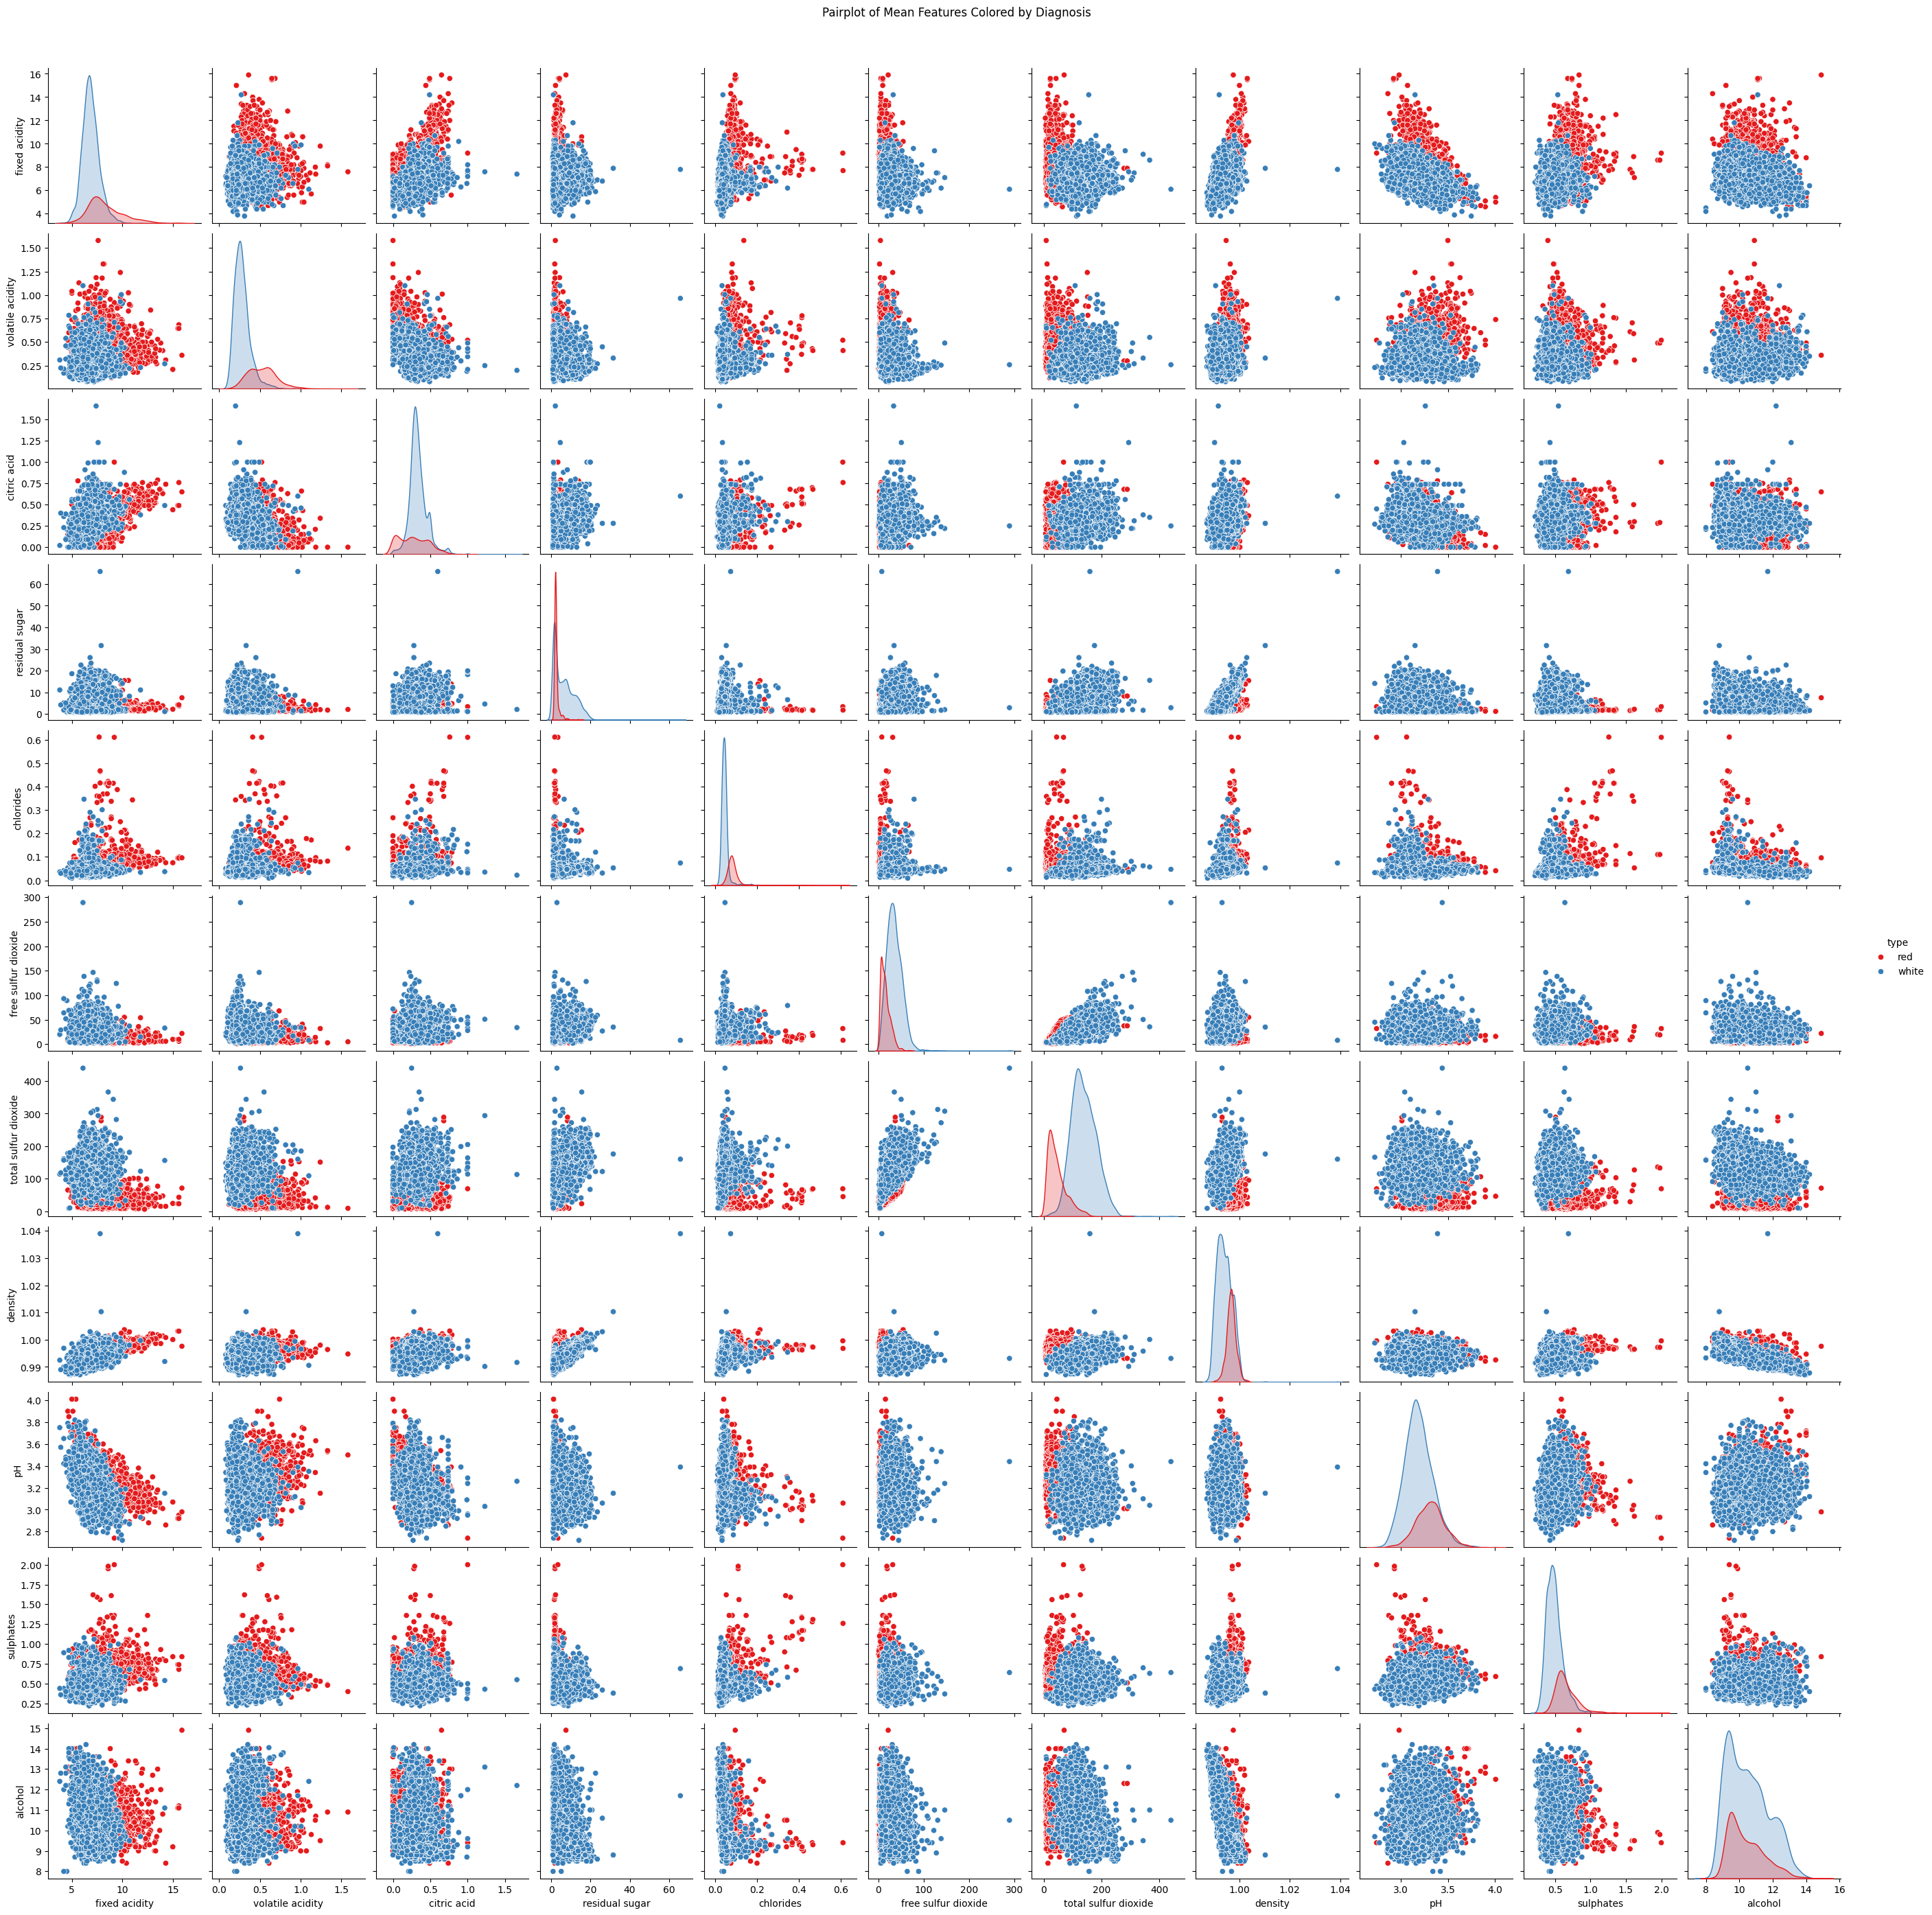

In [7]:
#pairplot for all mean features with hue as diagnosis
sns.pairplot(data, vars=data.columns[:11], hue=TARGET, palette='Set1')
plt.suptitle('Pairplot of Mean Features Colored by Diagnosis', y=1.02)
plt.show()
# Correlation heatmap
# plt.figure(figsize=(12, 10))
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap of Features')
# plt.show()

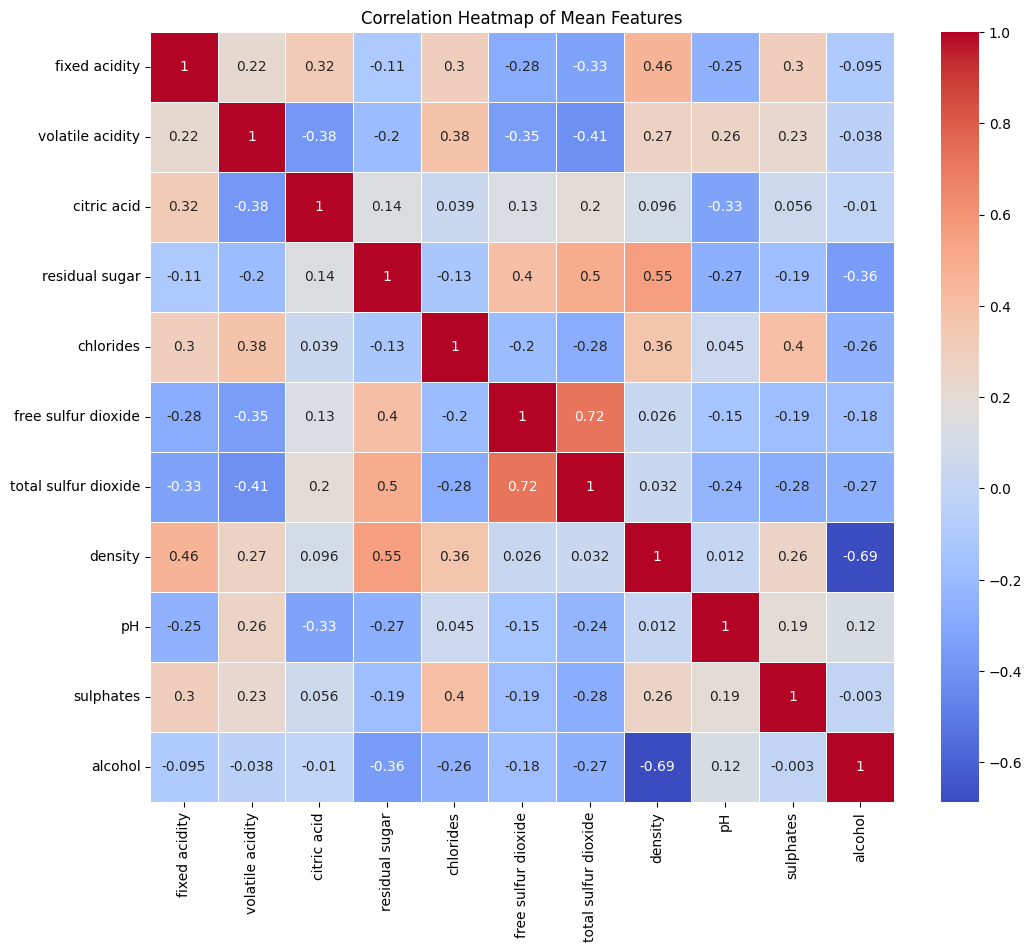

In [8]:
#first correlation matrix for all mean features with corr value in centrer of each cell
plt.figure(figsize=(12, 10))
correlation_matrix_mean = data.iloc[:, :11].corr()
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Mean Features')
plt.show()


 First PCA : 
 Find all usefull columns and all note very usefull ones.

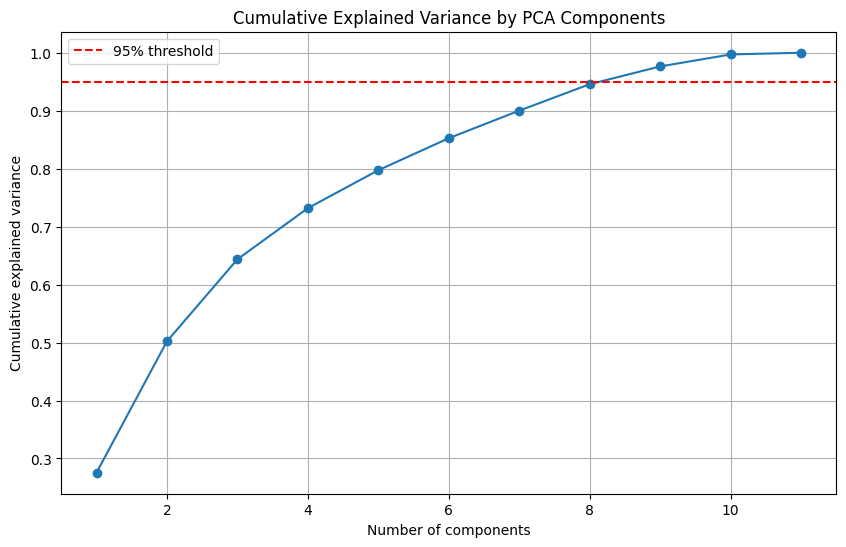

Number of components to reach 95% explained variance: 9
Feature contributions (most useful to least useful):
                 feature  contribution
2            citric acid      2.650926
1       volatile acidity      2.635478
8                     pH      2.569773
0          fixed acidity      2.554207
9              sulphates      2.528857
4              chlorides      2.456190
3         residual sugar      2.445657
5    free sulfur dioxide      2.431760
10               alcohol      2.401895
6   total sulfur dioxide      1.788205
7                density      1.367079


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric or non-useful columns for PCA
features = data.drop(columns=[TARGET, TARGET_2])

# Keep only numeric columns and drop columns with any NaN
features = features.select_dtypes(include=[np.number]).dropna(axis=1, how='any')

# Drop rows with any NaN values
features = features.dropna(axis=0, how='any')

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
explained_cum = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_cum)+1), explained_cum, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')  # 95% variance line
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.show()

# Find the number of components required to reach 95% explained variance
n_components_95 = np.argmax(explained_cum >= 0.95) + 1
print(f"Number of components to reach 95% explained variance: {n_components_95}")

# Compute feature contributions to the selected components
# Sum absolute values of loadings for the first n_components_95 components
contributions = np.sum(np.abs(pca.components_[:n_components_95, :]), axis=0)
contribution_df = pd.DataFrame({
    'feature': features.columns,
    'contribution': contributions
}).sort_values(by='contribution', ascending=False)

# Display features ordered from most to least contributive
print("Feature contributions (most useful to least useful):")
print(contribution_df)


In [11]:
# Select and create a dataset with only the most contributive features based on PCA analysis and save it in data as PCA_selected_data.csv
top_features = contribution_df['feature'].head(10).tolist()  # Select top
selected_data = data[[TARGET] + [TARGET_2] + top_features]
print("Dataset with most contributive features created.")
print("Selected features :", top_features)

selected_data.to_csv(r'../data/PCA_selected_data.csv', index=False)



Dataset with most contributive features created.
Selected features : ['citric acid', 'volatile acidity', 'pH', 'fixed acidity', 'sulphates', 'chlorides', 'residual sugar', 'free sulfur dioxide', 'alcohol', 'total sulfur dioxide']


missing and non numerical values/columns

Non-numeric columns and their types:
- type: dtype = object
  Unique values: ['red' 'white']

Numeric columns missing value analysis:
- fixed acidity: 0 missing values (0.00%)
- volatile acidity: 0 missing values (0.00%)
- citric acid: 0 missing values (0.00%)
- residual sugar: 0 missing values (0.00%)
- chlorides: 0 missing values (0.00%)
- free sulfur dioxide: 0 missing values (0.00%)
- total sulfur dioxide: 0 missing values (0.00%)
- density: 0 missing values (0.00%)
- pH: 0 missing values (0.00%)
- sulphates: 0 missing values (0.00%)
- alcohol: 0 missing values (0.00%)
- quality: 0 missing values (0.00%)


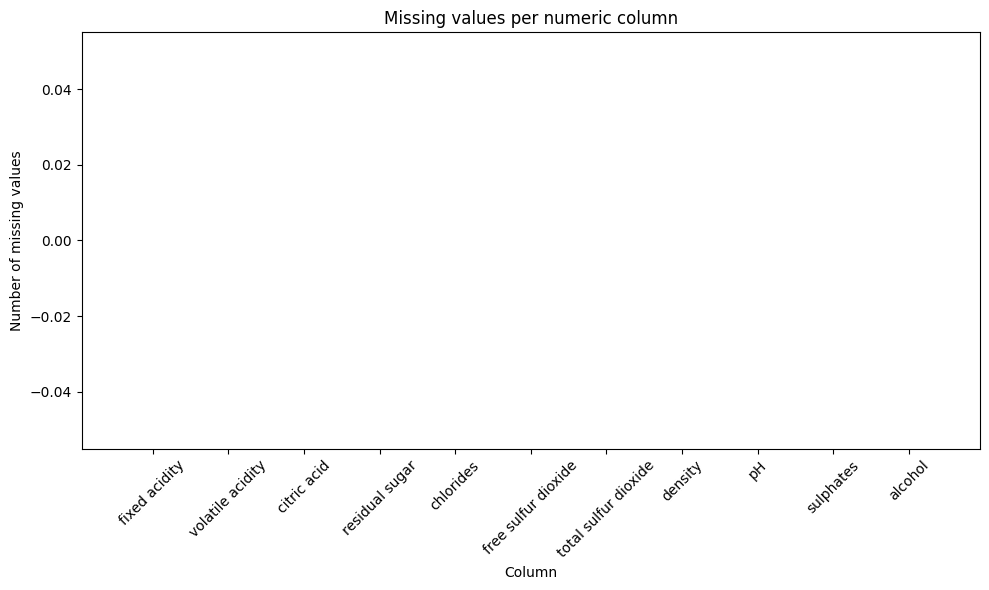

In [12]:
# ---- Identify non-numeric columns ----
# Non-numeric columns are detected using pandas' select_dtypes
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

print("Non-numeric columns and their types:")
for col in non_numeric_cols:
    # Print column name and its dtype
    print(f"- {col}: dtype = {data[col].dtype}")
    # Print unique values in the column
    print(f"  Unique values: {data[col].dropna().unique()}")
    print()

# ---- Identify numeric columns ----
numeric_cols = data.select_dtypes(include=[np.number]).columns

print("Numeric columns missing value analysis:")
missing_counts = data[numeric_cols].isna().sum()  # Count missing values
missing_percent = (missing_counts / len(data)) * 100  # Compute missing percentages

for col in numeric_cols:  # Exclude last column for brevity
    # Print the number and percentage of missing values
    print(f"- {col}: {missing_counts[col]} missing values ({missing_percent[col]:.2f}%)")

# ---- Plot histogram of number of missing values per numeric column ----
plt.figure(figsize=(10, 6))
plt.bar(numeric_cols[:-1], missing_counts[:-1])
plt.title("Missing values per numeric column")
plt.xlabel("Column")
plt.ylabel("Number of missing values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# the only non-numeric column is 'type' which contains 'white' and 'red' values
# Encoding 'type' column: white as 0 and red as 1
PCA_SELECTED_DF_PATH : str = r'../data/PCA_selected_data.csv'
data = pd.read_csv(PCA_SELECTED_DF_PATH)
data['type'] = data['type'].map({'white': 0, 'red': 1})
# No missing values
data.to_csv(r'../data/main_ready.csv', index=False)

More for Regression on Wine quality